#### Bases de l'Apprentissage
#### TP 1 - Décision Bayésienne
---

**Yuri DE SENE ALVIZI**


**1. Préliminaires**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from numpy.linalg import eig
import scipy
import math
from numpy.linalg import det

**2. Génération d'une variable aléatoire gaussienne**

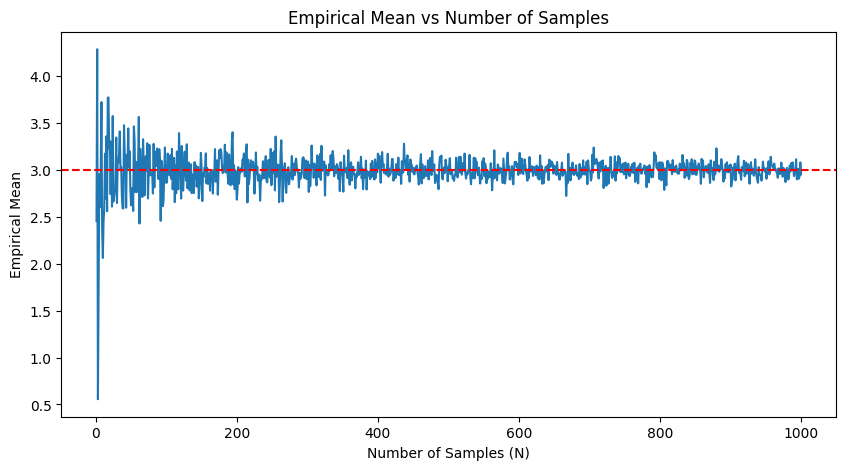

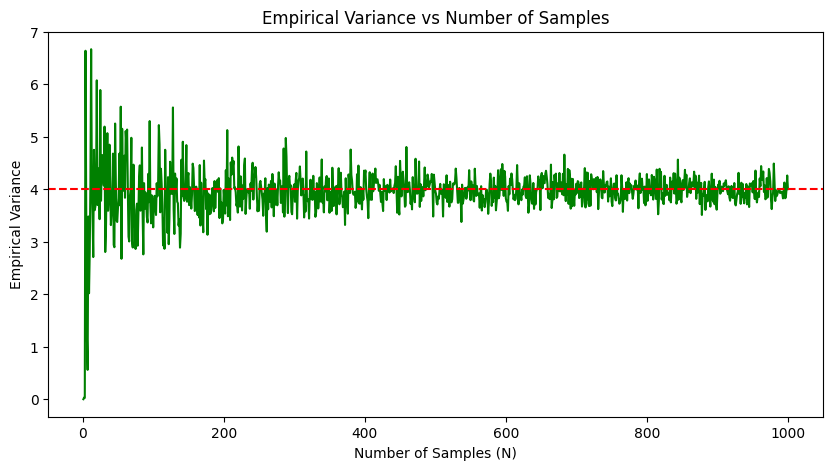

In [34]:
mean = 3
variance = 4

empirical_mean = []
empirical_variance = []

for N in range(1, 1001):
    samples = np.random.randn(N) * np.sqrt(variance) + mean
    empirical_mean.append(np.mean(samples))
    empirical_variance.append(np.var(samples))

# Empirical mean plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 1001), empirical_mean)
plt.xlabel('Number of Samples (N)')
plt.ylabel('Empirical Mean')
plt.axhline(y=3, color='r', linestyle='--')
plt.title('Empirical Mean vs Number of Samples')
plt.show()

# Empirical variance plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 1001), empirical_variance, color='green')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Empirical Variance')
plt.axhline(y=4, color='r', linestyle='--')
plt.title('Empirical Variance vs Number of Samples')
plt.show()

**3. Génération de vecteurs aléatoires gaussiens**

**3.1)** Générer un échantillon de taille N=100 d'un vecteur aléatoire gaussien défini par le vecteur moyenne m=[4 9] et la matrice de covariance égale à l'identité. Afficher les échantillons.

<h5 style="background-color: red;">
    Olhar se não é possível fazer usando multiplicação de matrizes
</h5>


Empirical mean: [4.07374413 9.00118425]
Empirical cov:
[[ 1.00908403 -0.02603767]
 [-0.02603767  0.99624125]]


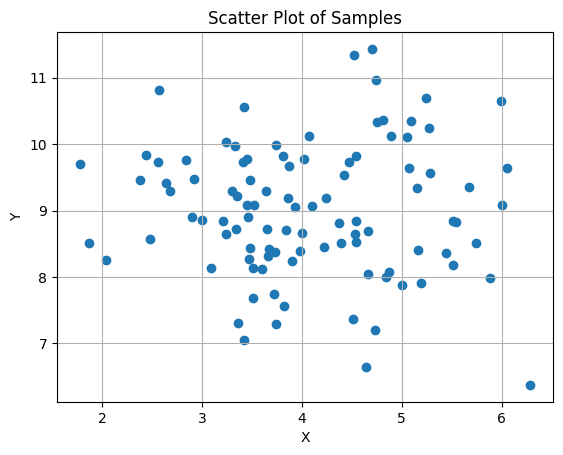

In [180]:
N = 100
mean = np.array([4, 9])
cov = np.eye(2)

samples = np.random.randn(2, N)

samples[0] = samples[0] * np.sqrt(cov[0][0]) + mean[0]
samples[1] = samples[1] * np.sqrt(cov[1][1]) + mean[1]

# samples = np.random.multivariate_normal(m, cov, N)

print(f'Empirical mean: {np.mean(samples, axis=1)}')
print(f'Empirical cov:\n{np.cov(samples)}')

plt.scatter(samples[0], samples[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Scatter Plot of Samples')
plt.show()



**3.2)** Donner l'expression permettant de générer N=100 échantillons d'un vecteur aléatoire de moyenne m=[4 9] et de matrice de covariance diagonale s= [1 0 ; 0 6] Vérifier votre résultat en utilisant les fonctions mean et cov et afficher les échantillons.

Empirical mean: [3.99864487 9.24844758]
Empirical cov:
[[0.86343443 0.07375739]
 [0.07375739 5.7533794 ]]


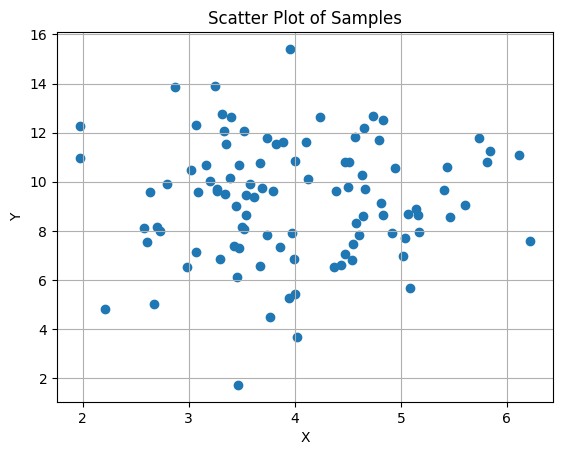

In [188]:
N = 100
m = np.array([4, 9])
s = np.array([[1, 0], [0, 6]])

samples = np.random.randn(2, N)

samples[0] = samples[0] * np.sqrt(s[0][0]) + m[0]
samples[1] = samples[1] * np.sqrt(s[1][1]) + m[1]

# samples = np.random.multivariate_normal(m, s, N)

print(f'Empirical mean: {np.mean(samples, axis=1)}')
print(f'Empirical cov:\n{np.cov(samples)}')

plt.scatter(samples[0], samples[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Scatter Plot of Samples')
plt.show()


**3.3)** Soit X un vecteur aléatoire gaussien centré de matrice de covariance égale à l'identité. Chercher une transformation linéaire X'= U X qui permette d'obtenir un vecteur aléatoire centré de matrice de covariance S .

**3.4)** Générer des échantillons dont la matrice de covariance est égale à s= [2 2;2 5]

Vérifier votre résultat avec les fonctions mean et cov.



Empirical mean of X': [-0.19616146 -0.23378387]
Empirical covariance of X':
[[2.26957191 2.67315148]
 [2.67315148 6.2618965 ]]


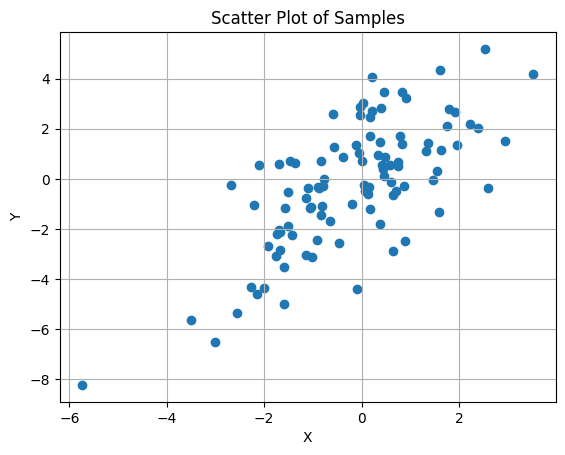

In [209]:
N = 100
X = np.random.randn(2, N)
S = np.array([[2, 2], [2, 5]])

# U is the lower triangular matrix of the Cholesky decomposition
U = np.linalg.cholesky(S) 

# Apply the linear transformation to obtain X'
X_prime = np.dot(U, X)

# Verify the mean and covariance of X'
X_prime_mean = np.mean(X_prime, axis=1)
X_prime_cov = np.cov(X_prime)

print(f"Empirical mean of X': {X_prime_mean}")
print(f"Empirical covariance of X':\n{X_prime_cov}")

plt.scatter(X_prime[0], X_prime[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Scatter Plot of Samples')
plt.show()


Calculer l'orientation de l'ellipsoide de Mahalanobis asscocié à s.


In [216]:
a = 0.5 * np.arctan2(2 * S[0, 1], S[0, 0] - S[1, 1])
a = math.degrees(a)
print(f'Angle of rotation: {a}º')

Angle of rotation: 63.43494882292201º



Vérifier la relation liant s à sa matrice diagonalisée Sd : s=V.Sd.Vt avec V, matrice des vecteurs propres de s.